# CSV + API

In this reboot, we are going to use:

- The [Goodreads books](https://www.kaggle.com/jealousleopard/goodreadsbooks) dataset from Kaggle.
- The [Open Library Books API](https://openlibrary.org/dev/docs/api/books)

The goal of this livecode is to load the data from a CSV + loop over rows to enrich each row with information such as:

- List of subjects (Science, Humor, Travel, etc.)
- The cover URL of the book
- Other information you'd find useful in the JSON API

First, download the CSV in the local folder:

In [1]:
!curl -L https://gist.githubusercontent.com/ssaunier/351b17f5a7a009808b60aeacd1f4a036/raw/books.csv > books.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1509k  100 1509k    0     0   125k      0  0:00:12  0:00:12 --:--:-- 67160


In [4]:
!head -n 3 books.csv

bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
1,Harry Potter and the Half-Blood Prince (Harry Potter  #6),J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
2,Harry Potter and the Order of the Phoenix (Harry Potter  #5),J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613


Then import the usual suspects!

In [5]:
import requests
import pandas as pd
import numpy as np

## Load books from CSV

In [6]:
books_df = pd.read_csv('books.csv')

In [15]:
books_df.set_index('isbn', inplace=True)

In [39]:
books_df['price'] = ''

In [40]:
books_df

,bookID,title,authors,average_rating,isbn13,language_code,# num_pages,ratings_count,text_reviews_count,price
isbn,,,,,,,,,,
0439785960,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,9780439785969,eng,652,1944099,26249,
0439358078,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,9780439358071,eng,870,1996446,27613,
0439554934,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,9780439554930,eng,320,5629932,70390,
0439554896,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,9780439554893,eng,352,6267,272,
043965548X,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,9780439655484,eng,435,2149872,33964,
...,...,...,...,...,...,...,...,...,...,...
0061186422,47699,M Is for Magic,Neil Gaiman-Teddy Kristiansen,3.82,9780061186424,eng,260,11317,1060,
0930289552,47700,Black Orchid,Neil Gaiman-Dave McKean,3.72,9780930289553,eng,160,8710,361,
0061238961,47701,InterWorld (InterWorld #1),Neil Gaiman-Michael Reaves,3.53,9780061238963,en-US,239,14334,1485,


In [37]:
google_api_key = '' #Replace with your own api key

def fetch_from_google_books(title):
#     url = f'https://www.googleapis.com/books/v1/volumes?q=isbn:{isbn}&key={google_api_key}'
    url = f'https://www.googleapis.com/books/v1/volumes?q=intitle:{title}&key={google_api_key}'

    try:
        response = requests.get(url)
        for book in response.json()['items']:
#             if 'saleInfo' in book:# and ('listPrice' in book['saleInfo'] or 'retailPrice' in book['saleInfo']):
            if ('listPrice' not in book['saleInfo']) and ('retailPrice' not in book['saleInfo']):
                return ''
            if 'listPrice' in book['saleInfo']:
                return book['saleInfo']['listPrice']['amount']
            else:
                return book['saleInfo']['retailPrice']['amount']
    except KeyError:
        return ''

In [50]:
for index, book in books_df.head(100).iterrows():
    print('Fetching for: ', index)
    books_df.loc[index, 'price'] = fetch_from_google_books(book['title'])

Fetching for:  0439785960
Fetching for:  0439358078
Fetching for:  0439554934
Fetching for:  0439554896
Fetching for:  043965548X
Fetching for:  0439682584
Fetching for:  0976540606
Fetching for:  0439827604
Fetching for:  0517226952
Fetching for:  0345453743
Fetching for:  1400052920
Fetching for:  0739322206
Fetching for:  0517149257
Fetching for:  076790818X
Fetching for:  0767915062
Fetching for:  0767910435
Fetching for:  0767903862
Fetching for:  076790382X
Fetching for:  0060920084
Fetching for:  0380713802
Fetching for:  0380727501
Fetching for:  0380715430
Fetching for:  0345538374
Fetching for:  0618517650
Fetching for:  0618346244
Fetching for:  0618346252
Fetching for:  0618260587
Fetching for:  0618391002
Fetching for:  0618510826
Fetching for:  0618153977
Fetching for:  193337201X
Fetching for:  097669400X
Fetching for:  0689840926
Fetching for:  1557344493
Fetching for:  0385326505
Fetching for:  1575606240
Fetching for:  1595580271
Fetching for:  1595962808
Fetching for

Let's add a new column

<AxesSubplot:xlabel='average_rating', ylabel='ratings_count'>

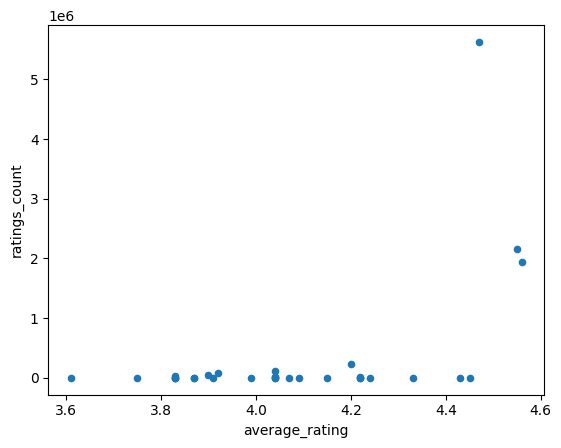

In [59]:
books_df[books_df['price']!=''].plot.scatter(x='average_rating', y='ratings_count')

<AxesSubplot:xlabel='isbn'>

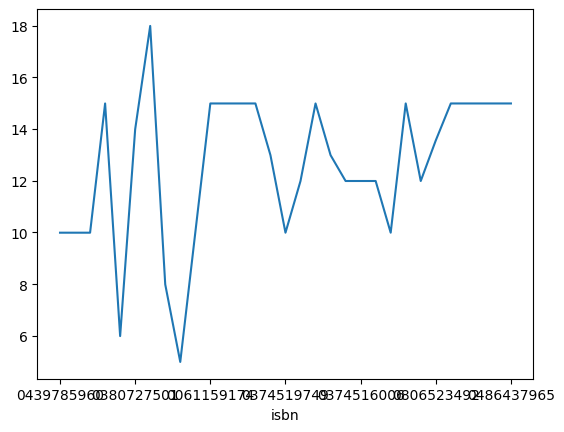

In [55]:
books_df[books_df['price']!='']['price'].plot()

## API - Open Library

In [ ]:
# YOUR CODE HERE

## Calling the API with multiple ISBNs at a time

In [ ]:
# YOUR CODE HERE